In [1]:
from zipline.pipeline.loaders.equity_pricing_loader import USEquityPricingLoader
from zipline.pipeline.domain import EquityCalendarDomain
from zipline.pipeline.data import USEquityPricing
import pandas as pd
import numpy as np
from sharadar.pipeline.engine import symbols, make_pipeline_engine, prices, symbols, load_sharadar_bundle, sids

from zipline.data.data_portal import DataPortal
# trading calender
from zipline.utils.calendar_utils import get_calendar
trading_calendar = get_calendar('XNYS')

pd.set_option('display.float_format', lambda x: '%.2f' % x)
bundle = load_sharadar_bundle()

In [2]:
ss = sids([112960,173730,185169,185169,173717,123553,184872,120782, 123553,176714, 167402,116071,178691, 110206, 120907,121215,116209,122591,115461,123716,120907, 121215,120953,120946,120946,120953, 120953])

In [3]:
for s in ss:
    print(s.symbol, s.exchange)

VXUP NASDAQ
NSTR NASDAQ
MZTH NYSEMKT
MZTH NYSEMKT
NTEC1 NASDAQ
FNET NASDAQ
GGA NYSEMKT
ULCM NASDAQ
FNET NASDAQ
EIIN NYSEMKT
NWG NYSE
AMOAQ NYSE
CRNS NASDAQ
GLK NYSE
PHIR NYSE
AIK NYSEMKT
ALCI NASDAQ
OPTI NASDAQ
BNSSA NASDAQ
SQM NYSE
PHIR NYSE
AIK NYSEMKT
AIJ NYSEMKT
LSMM NYSE
LSMM NYSE
AIJ NYSEMKT
AIJ NYSEMKT


In [6]:
start = pd.to_datetime('2001-10-25', utc=False)
end = pd.to_datetime('2024-07-08', utc=False)

# AAPL sid 199059
sids = symbols(['TSLA', 'F'])

In [7]:
sids[0].to_dict()

{'sid': 194897,
 'symbol': 'TSLA',
 'asset_name': 'TESLA INC',
 'start_date': Timestamp('2010-06-29 00:00:00'),
 'end_date': Timestamp('2024-07-12 00:00:00'),
 'first_traded': Timestamp('2010-06-29 00:00:00'),
 'auto_close_date': Timestamp('2024-07-13 00:00:00'),
 'exchange': 'NASDAQ',
 'exchange_full': 'NASDAQ',
 'tick_size': 0.01,
 'multiplier': 1.0,
 'exchange_info': ExchangeInfo('NASDAQ', 'NASDAQ', 'US')}

In [8]:
sids[1].to_dict()

{'sid': 199713,
 'symbol': 'F',
 'asset_name': 'FORD MOTOR CO',
 'start_date': Timestamp('1986-01-01 00:00:00'),
 'end_date': Timestamp('2024-07-12 00:00:00'),
 'first_traded': Timestamp('1986-01-01 00:00:00'),
 'auto_close_date': Timestamp('2024-07-13 00:00:00'),
 'exchange': 'NYSE',
 'exchange_full': 'NYSE',
 'tick_size': 0.01,
 'multiplier': 1.0,
 'exchange_info': ExchangeInfo('NYSE', 'NYSE', 'US')}

In [9]:
sids_n = [198566, 199713]
bundle.asset_finder.retrieve_all(sids_n)

[Equity(198566 [HON]), Equity(199713 [F])]

In [10]:
bundle.asset_finder.retrieve_asset(199059).start_date

Timestamp('1986-01-01 00:00:00')

In [11]:
p = prices(sids, start, end)
p

,Equity(194897 [TSLA]),Equity(199713 [F])
2001-10-25,NaN,16.52
2001-10-26,NaN,16.66
2001-10-29,NaN,16.21
2001-10-30,NaN,16.05
2001-10-31,NaN,16.05
...,...,...
2024-07-01,209.86,12.76
2024-07-02,231.26,12.87
2024-07-03,246.39,12.87
2024-07-05,251.52,12.84


In [12]:
pricing_reader = bundle.equity_daily_bar_reader
close, = pricing_reader.load_raw_arrays(['close'], start, end, sids_n,)
close

array([[ 29.  ,  16.52],
       [ 30.  ,  16.66],
       [ 29.9 ,  16.21],
       ...,
       [212.46,  12.87],
       [212.24,  12.84],
       [211.63,  12.98]])

In [13]:
# Apple's stock has split five times since the company went public.
# The stock split on a 4-for-1 basis on August 28, 2020, a 7-for-1 basis on June 9, 2014,
# and split on a 2-for-1 basis on February 28, 2005, June 21, 2000, and June 16, 1987.

In [14]:
sids = symbols(['AAPL'])

In [26]:
sids[0].to_dict()

{'sid': 199059,
 'symbol': 'AAPL',
 'asset_name': 'APPLE INC',
 'start_date': Timestamp('1986-01-01 00:00:00'),
 'end_date': Timestamp('2024-07-12 00:00:00'),
 'first_traded': Timestamp('1986-01-01 00:00:00'),
 'auto_close_date': Timestamp('2024-07-13 00:00:00'),
 'exchange': 'NASDAQ',
 'exchange_full': 'NASDAQ',
 'tick_size': 0.01,
 'multiplier': 1.0,
 'exchange_info': ExchangeInfo('NASDAQ', 'NASDAQ', 'US')}

In [27]:
p = prices(sids, start, end).values
p

array([  0.343,   0.333,   0.315, ..., 221.55 , 226.34 , 227.82 ])

In [28]:
len(trading_calendar.sessions_in_range(start, end))

5712

In [29]:
dates = trading_calendar.sessions_in_range(start, end)

In [31]:
data_portal = DataPortal(bundle.asset_finder,
                         trading_calendar=bundle.equity_daily_bar_reader.trading_calendar,
                         first_trading_day=start,
                         equity_daily_reader=bundle.equity_daily_bar_reader,
                         adjustment_reader=bundle.adjustment_reader)

close_adj = data_portal.get_history_window(assets = sids, 
                                    end_dt = end, 
                                    bar_count=len(dates),
                                    #bar_count = len(trading_calendar.sessions_in_range(start, end)),
                                    frequency = '1d',
                                    field = 'close',
                                    data_frequency = 'daily').values
close_adj

array([[  0.343],
       [  0.333],
       [  0.315],
       ...,
       [221.55 ],
       [226.34 ],
       [227.82 ]])

In [32]:
close_adj_df = pd.DataFrame(close_adj,columns= ['AAPL'], index= trading_calendar.sessions_in_range(start, end))

<Axes: >

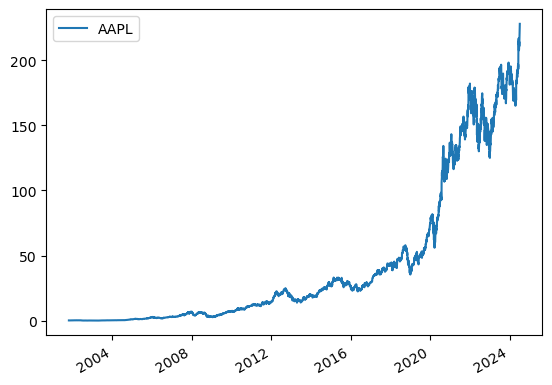

In [33]:
close_adj_df.plot()

In [34]:
close_adj

array([[  0.343],
       [  0.333],
       [  0.315],
       ...,
       [221.55 ],
       [226.34 ],
       [227.82 ]])

In [35]:
pricing_reader=bundle.equity_daily_bar_reader
close, = pricing_reader.load_raw_arrays(['close'], start, end, sids,)
close

array([[ 19.19],
       [ 18.67],
       [ 17.63],
       ...,
       [221.55],
       [226.34],
       [227.82]])

In [36]:
close_raw = pd.DataFrame(close, columns= ['AAPL'],index= trading_calendar.sessions_in_range(start, end))

<Axes: >

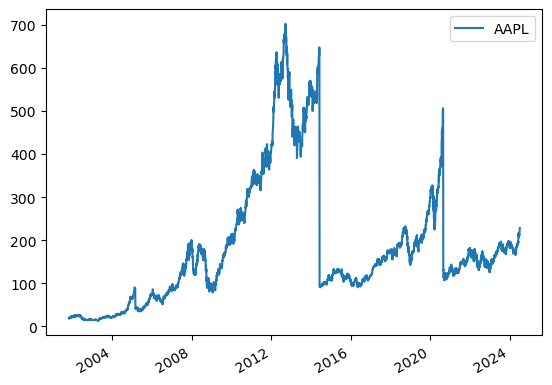

In [37]:
close_raw.plot()